In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl


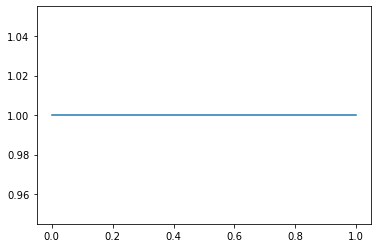

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


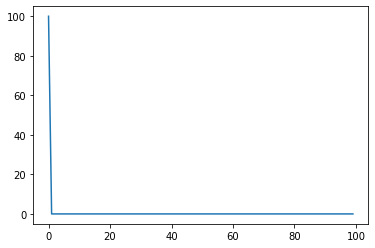

In [8]:
x = np.linspace(0,1, 100)
y = np.ones(100)
plt.plot(x,y)
plt.show()
plt.plot(fftpack.fft(y))

In [2]:
help(temp_lib)

Help on class temp_lib in module lib:

class temp_lib(builtins.object)
 |  temp_lib(image)
 |  
 |  Class used to perform spectral analysis
 |  
 |  Attributes:
 |  
 |  image : numpy ndarray  of shape (Nx, Ny)
 |  s :  integer - sampling ratio
 |  x, y : numpy ndarray  with respective shapes Nx et Ny
 |  fs : sampling frequency
 |  ds_band : numpy ndarray of shape Nx  - > extracted band from the image
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cross_spectro(self, other)
 |      Calculates either the product or the difference between the computed spectrograms of two ds_bands (signals)
 |      Assuming that the spectrograms are computed
 |  
 |  decrease_resolution(self, n)
 |      Decreases the resolution using numpy.convolve and updates ds_band
 |      Reset by calling extract_band
 |  
 |  extract_band(self, interval=None)
 |      Extracts a band from the image.
 |      If interval is a

In [3]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:83: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:85: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(other._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


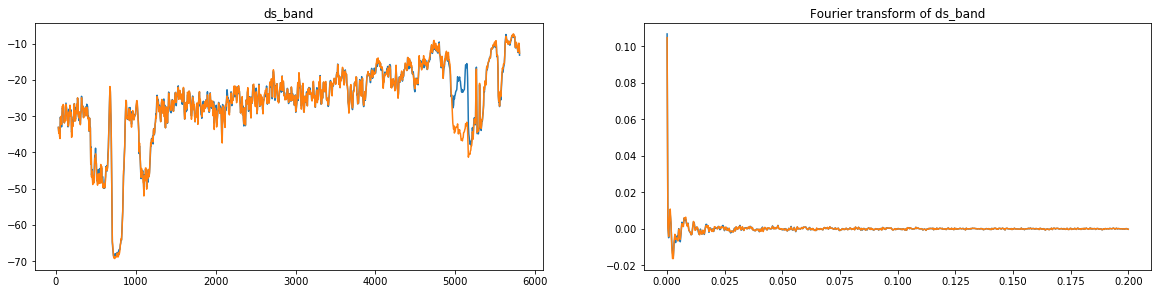

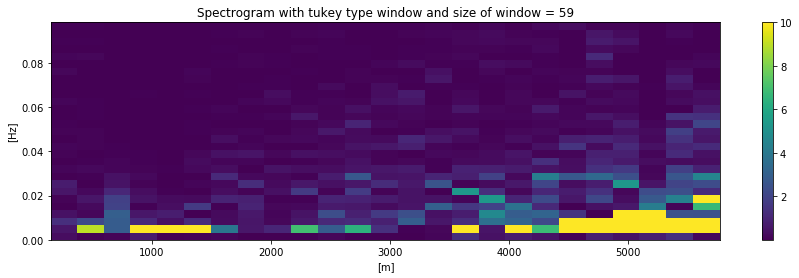

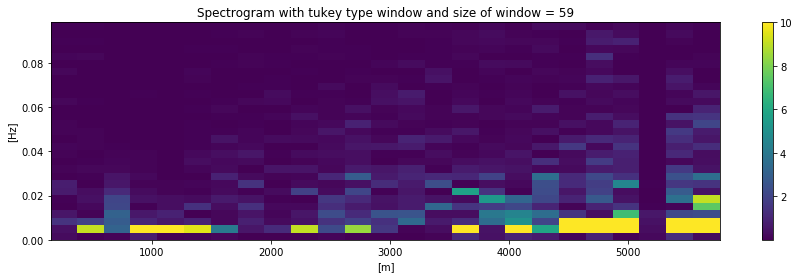

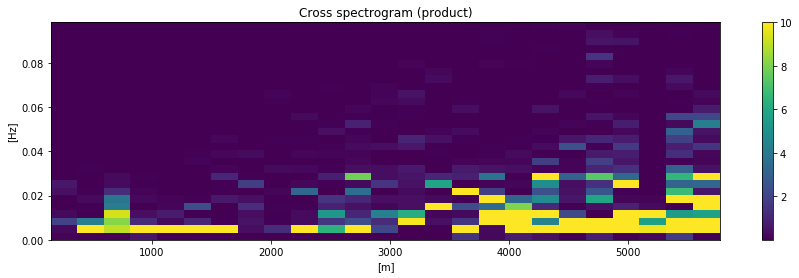

100


In [15]:
element1 = temp_lib(ds_band1)
element3 = temp_lib(ds_band3)


element1.plot_TF(element3)

#element1.decrease_resolution(20)
#element1.plot_TF()
element1.extract_band()
element1._multiplier = 100
element1._nwin = 20
element3._multiplier = 100
element3._nwin = 20
element1.spectrogram('tukey')
element3.spectrogram('tukey')
element1.cross_spectro(element3)
print(element1._multiplier)

In [5]:
help(element1.plot_TF)

Help on method plot_TF in module lib:

plot_TF(other=None) method of lib.temp_lib instance
    Plots the fourier transform of ds_band and ds_band itself



3000.0  <<< Nb of points 
6.381090912077192  <<< max frequency of the input signal 
[0.         0.03517588 0.07035176 0.10552764 0.14070352 0.1758794
 0.21105528 0.24623116 0.28140704 0.31658291 0.35175879 0.38693467
 0.42211055 0.45728643 0.49246231 0.52763819 0.56281407 0.59798995
 0.63316583 0.66834171 0.70351759 0.73869347 0.77386935 0.80904523
 0.84422111 0.87939698 0.91457286 0.94974874 0.98492462 1.0201005
 1.05527638 1.09045226 1.12562814 1.16080402 1.1959799  1.23115578
 1.26633166 1.30150754 1.33668342 1.3718593  1.40703518 1.44221106
 1.47738693 1.51256281 1.54773869 1.58291457 1.61809045 1.65326633
 1.68844221 1.72361809 1.75879397 1.79396985 1.82914573 1.86432161
 1.89949749 1.93467337 1.96984925 2.00502513 2.04020101 2.07537688
 2.11055276 2.14572864 2.18090452 2.2160804  2.25125628 2.28643216
 2.32160804 2.35678392 2.3919598  2.42713568 2.46231156 2.49748744
 2.53266332 2.5678392  2.60301508 2.63819095 2.67336683 2.70854271
 2.74371859 2.77889447 2.81407035 2.84924623 2.

/home/wilhelm/INSA/4A/S2/CESBIO/how2spectro_Morlet2.py:165: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/home/wilhelm/INSA/4A/S2/CESBIO/how2spectro_Morlet2.py:183: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/home/wilhelm/INSA/4A/S2/CESBIO/how2spectro_Morlet2.py:189: RuntimeWarning: divide by zero encountered in true_divide
  widths = w*fs / (2*d1f*np.pi)


(3000,) <<< ACH-print.shape(d1t), <<<
(200, 3000) <<< ACH-print size(cwtmatr) <<<


/home/wilhelm/INSA/4A/S2/CESBIO/how2spectro_Morlet2.py:197: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


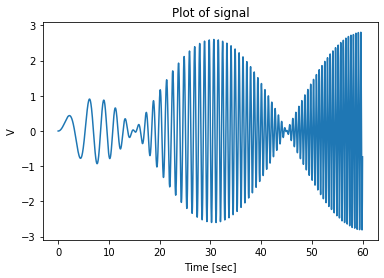

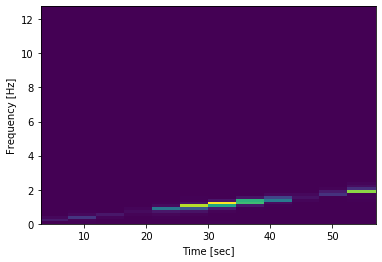

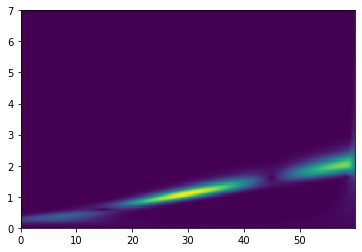

In [14]:
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt


5965


<ipython-input-49-67e62a902b87>:34: RuntimeWarning: invalid value encountered in multiply
  cwtm1 = cwt(ds_target1bis, morlet2, widths, w = w)*100
<ipython-input-49-67e62a902b87>:35: RuntimeWarning: invalid value encountered in multiply
  cwtm3 = cwt(ds_target3bis, morlet2, widths, w = w)*100
<ipython-input-49-67e62a902b87>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


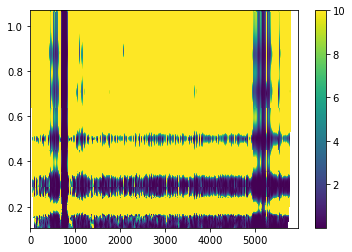

In [49]:
ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)

ls = 712
le = 728
for i in range(ls,le):
    ds_target1 = ds_band1[i,:] + ds_target1
    ds_target3 = ds_band3[i,:] + ds_target3
ds_target1 = ds_target1/(le-ls)
ds_target3 = ds_target3/(le-ls)
N = len(ds_target1)
length = N*5 # 1 pixel correspond to 5 metres (?)
fs = N/length

Tobs = length
print(Tobs)
d1x = np.arange(N)/float(fs)
x = np.linspace(0,length,N)
xf = np.linspace(0,length*fs/2,N//2)/length
fy = fftpack.fft(ds_target1)[:N//2]/N
fy2 = fftpack.fft(ds_target3)[:N//2]/N

d1fmax = np.max(abs(fy))
d2fmax = np.max(abs(fy2))

w = 10
d1f = np.linspace(d1fmax, d1fmax*10, 2000 )
widths = w*fs / (2*d1f *np.pi)

cwtm1 = cwt(ds_target1bis, morlet2, widths, w = w)*100
cwtm3 = cwt(ds_target3bis, morlet2, widths, w = w)*100

fig3 = plt.figure(3)
plt.pcolormesh(d1x,d1f,np.abs(cwtm1*np.conj(cwtm3)),cmap = 'viridis',vmax = 10)
plt.colorbar()
fig3.show()



In [40]:
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

ds = gdal.Open(Tifpath1)

ds_band1bis = ds_target1/np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3bis = ds_target3/np.array(ds.GetRasterBand(1).ReadAsArray())

ds_target1bis = np.zeros(len(ds_band3bis[1000,:]))
ds_target3bis = np.zeros(len(ds_band3bis[1000,:]))

ls1 = 712
le1 = 728
for i in range(ls,le):
    ds_target1bis = ds_band1bis[i,:] + ds_target1bis
    ds_target3bis = ds_band3bis[i,:] + ds_target3bis

ds_target1bis = ds_target1bis/(le1-ls1)
ds_target3bis = ds_target3bis/(le1-ls1)

<ipython-input-40-4ec5954998fe>:5: RuntimeWarning: divide by zero encountered in true_divide
  ds_band1bis = ds_target1/np.array(ds.GetRasterBand(1).ReadAsArray())
<ipython-input-40-4ec5954998fe>:5: RuntimeWarning: invalid value encountered in true_divide
  ds_band1bis = ds_target1/np.array(ds.GetRasterBand(1).ReadAsArray())
<ipython-input-40-4ec5954998fe>:6: RuntimeWarning: divide by zero encountered in true_divide
  ds_band3bis = ds_target3/np.array(ds.GetRasterBand(1).ReadAsArray())
<ipython-input-40-4ec5954998fe>:6: RuntimeWarning: invalid value encountered in true_divide
  ds_band3bis = ds_target3/np.array(ds.GetRasterBand(1).ReadAsArray())
